# Question 2 : Multi-layer Perceptron Regression Problem

The dataset can be found in data/Reg-Data.txt
This dataset has 68 continuous features, longitude and latitude in the end of each line.
The goal is to predict the longitude and latitude based on the 68 continuous features.

In [1]:
import numpy as np
import pandas as pd
import torch

## Loading the data



In [2]:
df = pd.read_csv('data/Reg-Data.txt',header=None)
df['longitude'] = df[68]
df['latitude'] = df[69]
df = df.drop([68,69],axis = 1)
X = df.drop(['longitude','latitude'],axis = 1).values
y = df[['longitude','latitude']].values
df

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,longitude,latitude
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.399577,0.310805,-0.039326,-0.111546,0.304586,-0.943453,0.114960,-0.335898,0.826753,-0.393786,...,-0.558717,0.998897,-0.106835,1.526307,0.646088,2.467278,1.867699,1.719302,-6.17,35.74
1055,1.640386,1.306224,0.192745,-1.816855,-1.311906,-2.128963,-1.875967,0.094232,-1.429742,0.873777,...,0.223143,-0.032425,0.226782,0.182107,0.517466,1.126762,2.220671,4.422651,11.55,104.91
1056,-0.772360,-0.670596,-0.840420,-0.832105,0.277346,1.152162,0.241470,0.229092,0.019036,-0.068804,...,0.449239,-0.965270,-0.590039,-0.804297,0.044170,-0.718175,-0.983640,-0.573822,41.33,19.80
1057,-0.996965,-1.099395,3.515274,-0.508185,-1.102654,0.192081,0.069821,0.264674,-0.411533,0.501164,...,1.941398,1.769292,0.738616,1.240377,-0.546002,-0.137473,-0.781036,-0.832167,54.68,25.31


## Train/Test Split
15% of the dataset is assigned to test set. 10% of the remaining data is assigned to validation set. And the rest is assigned to training set.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)

## Data Preprocessing

### Dealing with null values
There are no null values.

In [4]:
df.isnull().sum()

0            0
1            0
2            0
3            0
4            0
            ..
65           0
66           0
67           0
longitude    0
latitude     0
Length: 70, dtype: int64

### Scaling features to a range
68 continuous features are not between 0 and 1. So let's use MinMaxScaler to scale this dataset.

In [5]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Converting the numpy arrays to tensors

In [6]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float)
X_val_tensor = torch.tensor(X_val, dtype=torch.float)
X_test_tensor = torch.tensor(X_test, dtype=torch.float)

y_train_tensor = torch.tensor(y_train, dtype=torch.float).reshape(-1,2)
y_val_tensor = torch.tensor(y_val, dtype=torch.float).reshape(-1,2)
y_test_tensor = torch.tensor(y_test, dtype=torch.float).reshape(-1,2)

## Part 1 : Linear Regression using Sklearn

In [7]:
%%time
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

print(f'Loss : {reg.score(X_test, y_test)}')

Loss : 0.14647679073528275
CPU times: user 28.7 ms, sys: 16.6 ms, total: 45.3 ms
Wall time: 57.8 ms


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE : {mse}  MAE : {mae}')

MSE : 1170.5617551861633  MAE : 24.352326787139795


# Defining the model

In [292]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, n_cont, out_sz, layers, p=0.5, activation_function = nn.ReLU(inplace=True),
                enable_dropout = False, enable_batch_normalization = False) :
        super().__init__()
        self.enable_batch_normalization = enable_batch_normalization
        if enable_batch_normalization :
            self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_in = n_cont
        if len(layers) == 0 :
            layerlist.append(nn.Linear(n_in,out_sz))
            if activation_function != None :
                layerlist.append(activation_function)
            if enable_dropout == True :
                layerlist.append(nn.Dropout(p))
        else :
            for i in layers:
                layerlist.append(nn.Linear(n_in,i)) 
                if activation_function != None :
                    layerlist.append(activation_function)
                if enable_batch_normalization :
                    layerlist.append(nn.BatchNorm1d(i))
                if enable_dropout == True :
                    layerlist.append(nn.Dropout(p))
                n_in = i
            layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cont):
        if self.enable_batch_normalization :
            x_cont = self.bn_cont(x_cont)
        x = self.layers(x_cont)
        return x

In [293]:
def train(model,criterion,optimizer,epochs) :
    training_losses = []
    valid_losses = []
    test_losses = []

    for i in range(epochs):
        i += 1
        # Validation Loss
        with torch.no_grad():
            y_val = model(X_val_tensor)
            valid_loss = criterion(y_val, y_val_tensor)
            valid_losses.append(valid_loss.item())
        # Test Loss
        with torch.no_grad():
            y_val = model(X_test_tensor)
            test_loss = criterion(y_val, y_test_tensor)
            test_losses.append(test_loss.item())

        y_pred = model(X_train_tensor)
        loss = criterion(y_pred, y_train_tensor)
        training_losses.append(loss.item())

        if i%5 == 1:
            print(f'Epoch: {i:3}  Training Loss: {loss.item():10.8f} Validation Loss: {valid_loss} Test Loss: {test_loss}')

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch: {i:3}  Training Loss: {loss.item():10.8f} Validation Loss: {valid_loss} Test Loss: {test_loss}')

    return training_losses,valid_losses,test_losses


In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_diagrams(training_losses,valid_losses,test_losses) :
    
    plt.plot(training_losses)
    plt.plot(valid_losses)
    plt.plot(test_losses)
    plt.title('Loss per epoch')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['train','validation', 'test'], loc='upper right')
    plt.show()

# Part 2 : Neural network without any hidden layer

### Loss function : MSE & optimizer : SGD
I got the best result with MSE loss function and SGD optimizer.

In [12]:
torch.manual_seed(42)
in_features = 68
out_features = 2
hidden_layers = []
model = Model(in_features, out_features, hidden_layers, p=0.5)
model

Model(
  (layers): Sequential(
    (0): Linear(in_features=68, out_features=2, bias=True)
    (1): ReLU(inplace=True)
  )
)

In [13]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#### Training for 50 epochs
The results from Linear Regression is bettet than this model.

In [14]:
%%time
epochs = 50
training_losses,valid_losses,test_losses = train(model,criterion,optimizer,epochs)

Epoch:   1  Training Loss: 2539.95239258 Validation Loss: 2090.665771484375 Test Loss: 2721.414794921875
Epoch:   6  Training Loss: 2472.99877930 Validation Loss: 2014.5233154296875 Test Loss: 2649.400634765625
Epoch:  11  Training Loss: 2363.45410156 Validation Loss: 1886.6807861328125 Test Loss: 2529.57275390625
Epoch:  16  Training Loss: 2277.40405273 Validation Loss: 1780.03662109375 Test Loss: 2431.60888671875
Epoch:  21  Training Loss: 2233.26196289 Validation Loss: 1717.48193359375 Test Loss: 2376.513671875
Epoch:  26  Training Loss: 2220.07812500 Validation Loss: 1690.3802490234375 Test Loss: 2354.86279296875
Epoch:  31  Training Loss: 2220.53491211 Validation Loss: 1682.01318359375 Test Loss: 2349.869140625
Epoch:  36  Training Loss: 2223.04565430 Validation Loss: 1680.255859375 Test Loss: 2349.72412109375
Epoch:  41  Training Loss: 2223.42895508 Validation Loss: 1679.8043212890625 Test Loss: 2349.59521484375
Epoch:  46  Training Loss: 2221.88696289 Validation Loss: 1679.59326

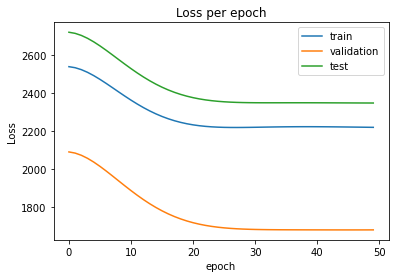

In [15]:
show_diagrams(training_losses,valid_losses,test_losses)

#### Training for 10 epochs
The results from Linear Regression is bettet than this model.

In [16]:
epochs = 10
model = Model(in_features, out_features, hidden_layers, p=0.5)
training_losses,valid_losses,test_losses = train(model,criterion,optimizer,epochs)

Epoch:   1  Training Loss: 2539.49804688 Validation Loss: 2089.98681640625 Test Loss: 2720.573974609375
Epoch:   6  Training Loss: 2539.49804688 Validation Loss: 2089.98681640625 Test Loss: 2720.573974609375
Epoch:  10  Training Loss: 2539.49804688 Validation Loss: 2089.98681640625 Test Loss: 2720.573974609375


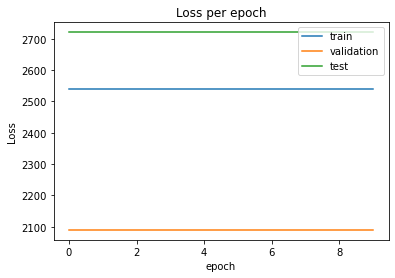

In [17]:
show_diagrams(training_losses,valid_losses,test_losses)

### Loss function : MSE & optimizer : Adam

In [18]:
torch.manual_seed(42)
in_features = 68
out_features = 2
hidden_layers = []
model = Model(in_features, out_features, hidden_layers, p=0.5)
model

Model(
  (layers): Sequential(
    (0): Linear(in_features=68, out_features=2, bias=True)
    (1): ReLU(inplace=True)
  )
)

In [19]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


#### Training for 50 epochs
The results from Linear Regression is bettet than this model.

In [20]:
%%time
epochs = 50
training_losses,valid_losses,test_losses = train(model,criterion,optimizer,epochs)

Epoch:   1  Training Loss: 2539.95239258 Validation Loss: 2090.665771484375 Test Loss: 2721.414794921875
Epoch:   6  Training Loss: 2537.25439453 Validation Loss: 2087.596435546875 Test Loss: 2718.52197265625
Epoch:  11  Training Loss: 2534.56469727 Validation Loss: 2084.53515625 Test Loss: 2715.641845703125
Epoch:  16  Training Loss: 2531.88916016 Validation Loss: 2081.48779296875 Test Loss: 2712.775634765625
Epoch:  21  Training Loss: 2529.22778320 Validation Loss: 2078.455322265625 Test Loss: 2709.923828125
Epoch:  26  Training Loss: 2526.58251953 Validation Loss: 2075.438232421875 Test Loss: 2707.087646484375
Epoch:  31  Training Loss: 2523.95239258 Validation Loss: 2072.437744140625 Test Loss: 2704.267333984375
Epoch:  36  Training Loss: 2521.33886719 Validation Loss: 2069.4541015625 Test Loss: 2701.46337890625
Epoch:  41  Training Loss: 2518.74194336 Validation Loss: 2066.487548828125 Test Loss: 2698.676513671875
Epoch:  46  Training Loss: 2516.16162109 Validation Loss: 2063.5380

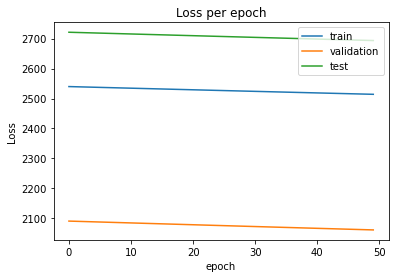

In [21]:
show_diagrams(training_losses,valid_losses,test_losses)

#### Training for 10 epochs
The results from Linear Regression is bettet than this model.

In [22]:
epochs = 10
model = Model(in_features, out_features, hidden_layers, p=0.5)
training_losses,valid_losses,test_losses = train(model,criterion,optimizer,epochs)

Epoch:   1  Training Loss: 2539.49804688 Validation Loss: 2089.98681640625 Test Loss: 2720.573974609375
Epoch:   6  Training Loss: 2539.49804688 Validation Loss: 2089.98681640625 Test Loss: 2720.573974609375
Epoch:  10  Training Loss: 2539.49804688 Validation Loss: 2089.98681640625 Test Loss: 2720.573974609375


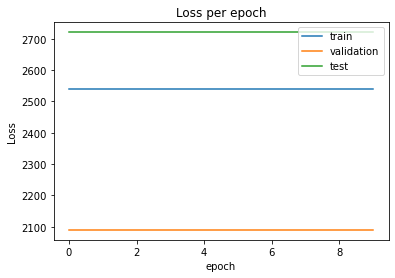

In [23]:
show_diagrams(training_losses,valid_losses,test_losses)

### Loss function : MAE & optimizer : SGD


In [24]:
torch.manual_seed(42)
in_features = 68
out_features = 2
hidden_layers = []
model = Model(in_features, out_features, hidden_layers, p=0.5)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
model


Model(
  (layers): Sequential(
    (0): Linear(in_features=68, out_features=2, bias=True)
    (1): ReLU(inplace=True)
  )
)

#### Training for 50 epochs
The results from Linear Regression is bettet than this model.

In [25]:
%%time
epochs = 50
training_losses,valid_losses,test_losses = train(model,criterion,optimizer,epochs)


Epoch:   1  Training Loss: 39.73236465 Validation Loss: 36.50029754638672 Test Loss: 41.94256591796875
Epoch:   6  Training Loss: 39.71693039 Validation Loss: 36.484397888183594 Test Loss: 41.92665100097656
Epoch:  11  Training Loss: 39.68357849 Validation Loss: 36.44974899291992 Test Loss: 41.8923454284668
Epoch:  16  Training Loss: 39.63965225 Validation Loss: 36.40412902832031 Test Loss: 41.847164154052734
Epoch:  21  Training Loss: 39.58948517 Validation Loss: 36.35200881958008 Test Loss: 41.795562744140625
Epoch:  26  Training Loss: 39.53562927 Validation Loss: 36.29606246948242 Test Loss: 41.74016189575195
Epoch:  31  Training Loss: 39.47959900 Validation Loss: 36.23785400390625 Test Loss: 41.682533264160156
Epoch:  36  Training Loss: 39.42227936 Validation Loss: 36.178314208984375 Test Loss: 41.62357711791992
Epoch:  41  Training Loss: 39.36420059 Validation Loss: 36.11798095703125 Test Loss: 41.5638427734375
Epoch:  46  Training Loss: 39.30567551 Validation Loss: 36.05718231201

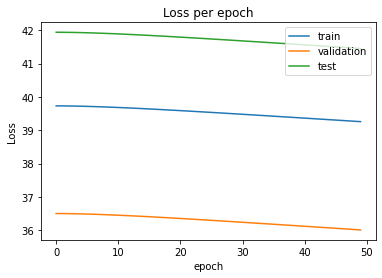

In [26]:
show_diagrams(training_losses,valid_losses,test_losses)


#### Training for 10 epochs
The results from Linear Regression is bettet than this model.

In [27]:
epochs = 10
model = Model(in_features, out_features, hidden_layers, p=0.5)
training_losses,valid_losses,test_losses = train(model,criterion,optimizer,epochs)


Epoch:   1  Training Loss: 39.72853088 Validation Loss: 36.49102020263672 Test Loss: 41.93229293823242
Epoch:   6  Training Loss: 39.72853088 Validation Loss: 36.49102020263672 Test Loss: 41.93229293823242
Epoch:  10  Training Loss: 39.72853088 Validation Loss: 36.49102020263672 Test Loss: 41.93229293823242


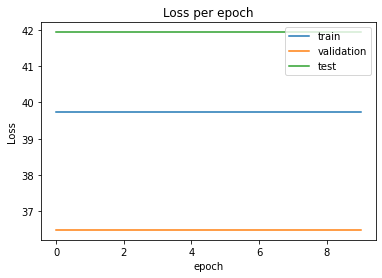

In [28]:
show_diagrams(training_losses,valid_losses,test_losses)

### Loss function : MAE & optimizer : Adam

In [29]:
torch.manual_seed(42)
in_features = 68
out_features = 2
hidden_layers = []
model = Model(in_features, out_features, hidden_layers, p=0.5)
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model


Model(
  (layers): Sequential(
    (0): Linear(in_features=68, out_features=2, bias=True)
    (1): ReLU(inplace=True)
  )
)

#### Training for 50 epochs
The results from Linear Regression is bettet than this model.

Epoch:   1  Training Loss: 39.73236465 Validation Loss: 36.50029754638672 Test Loss: 41.94256591796875
Epoch:   6  Training Loss: 39.69264221 Validation Loss: 36.45890808105469 Test Loss: 41.90190887451172
Epoch:  11  Training Loss: 39.65286636 Validation Loss: 36.41733932495117 Test Loss: 41.86124038696289
Epoch:  16  Training Loss: 39.61309814 Validation Loss: 36.375770568847656 Test Loss: 41.82057189941406
Epoch:  21  Training Loss: 39.57332611 Validation Loss: 36.33420181274414 Test Loss: 41.7799072265625
Epoch:  26  Training Loss: 39.53355789 Validation Loss: 36.292625427246094 Test Loss: 41.7392463684082
Epoch:  31  Training Loss: 39.49378967 Validation Loss: 36.25106430053711 Test Loss: 41.698577880859375
Epoch:  36  Training Loss: 39.45402145 Validation Loss: 36.209495544433594 Test Loss: 41.65791320800781
Epoch:  41  Training Loss: 39.41425705 Validation Loss: 36.167930603027344 Test Loss: 41.617252349853516
Epoch:  46  Training Loss: 39.37449265 Validation Loss: 36.1263656616

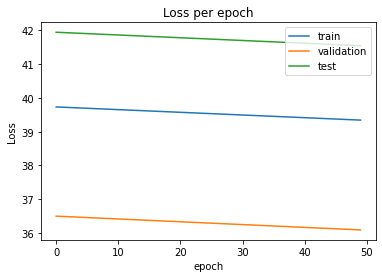

CPU times: user 166 ms, sys: 7.06 ms, total: 173 ms
Wall time: 171 ms


In [30]:

%%time
epochs = 50
training_losses,valid_losses,test_losses = train(model,criterion,optimizer,epochs)

show_diagrams(training_losses,valid_losses,test_losses)

#### Training for 10 epochs
The results from Linear Regression is bettet than this model.

Epoch:   1  Training Loss: 39.72853088 Validation Loss: 36.49102020263672 Test Loss: 41.93229293823242
Epoch:   6  Training Loss: 39.72853088 Validation Loss: 36.49102020263672 Test Loss: 41.93229293823242
Epoch:  10  Training Loss: 39.72853088 Validation Loss: 36.49102020263672 Test Loss: 41.93229293823242


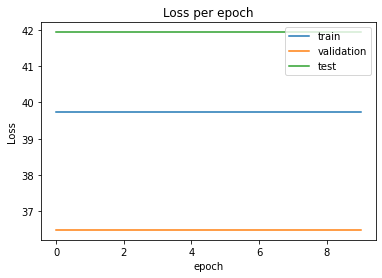

In [31]:
epochs = 10
model = Model(in_features, out_features, hidden_layers, p=0.5)
training_losses,valid_losses,test_losses = train(model,criterion,optimizer,epochs)

show_diagrams(training_losses,valid_losses,test_losses)


# Part 3 
ReLU was chosen as the activation function because the range of other activation functions is not between (-180,180).
As you can see, the results almost stayed the same with or without the activation function.

In [38]:
in_features = 68
out_features = 2
hidden_layers = []
model = Model(in_features, out_features, hidden_layers, p=0.5, activation_function = nn.ReLU(inplace = True))
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
model

Model(
  (layers): Sequential(
    (0): Linear(in_features=68, out_features=2, bias=True)
    (1): ReLU(inplace=True)
  )
)

### 50 Epochs

In [39]:
%%time
epochs = 50
training_losses,valid_losses,test_losses = train(model,criterion,optimizer,epochs)

Epoch:   1  Training Loss: 2539.95239258 Validation Loss: 2090.665771484375 Test Loss: 2721.414794921875
Epoch:   6  Training Loss: 2472.99877930 Validation Loss: 2014.5233154296875 Test Loss: 2649.400634765625
Epoch:  11  Training Loss: 2363.45410156 Validation Loss: 1886.6807861328125 Test Loss: 2529.57275390625
Epoch:  16  Training Loss: 2277.40405273 Validation Loss: 1780.03662109375 Test Loss: 2431.60888671875
Epoch:  21  Training Loss: 2233.26196289 Validation Loss: 1717.48193359375 Test Loss: 2376.513671875
Epoch:  26  Training Loss: 2220.07812500 Validation Loss: 1690.3802490234375 Test Loss: 2354.86279296875
Epoch:  31  Training Loss: 2220.53491211 Validation Loss: 1682.01318359375 Test Loss: 2349.869140625
Epoch:  36  Training Loss: 2223.04565430 Validation Loss: 1680.255859375 Test Loss: 2349.72412109375
Epoch:  41  Training Loss: 2223.42895508 Validation Loss: 1679.8043212890625 Test Loss: 2349.59521484375
Epoch:  46  Training Loss: 2221.88696289 Validation Loss: 1679.59326

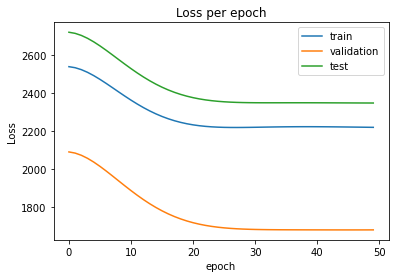

In [40]:
show_diagrams(training_losses,valid_losses,test_losses)

### 10 Epochs

In [45]:
%%time
model = Model(in_features, out_features, hidden_layers, p=0.5, activation_function = nn.ReLU(inplace = True))
epochs = 10
training_losses,valid_losses,test_losses = train(model,criterion,optimizer,epochs)

Epoch:   1  Training Loss: 2543.59814453 Validation Loss: 2094.75 Test Loss: 2725.2822265625
Epoch:   6  Training Loss: 2543.59814453 Validation Loss: 2094.75 Test Loss: 2725.2822265625
Epoch:  10  Training Loss: 2543.59814453 Validation Loss: 2094.75 Test Loss: 2725.2822265625
CPU times: user 8.09 ms, sys: 2.13 ms, total: 10.2 ms
Wall time: 8.5 ms


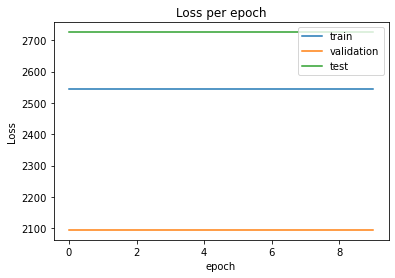

In [46]:
show_diagrams(training_losses,valid_losses,test_losses)

# Part 4 : Trying different batch sizes
Different batch sizes did make the performance of the model much better. I did 3 experiments to prove this point. For example :

Batch Size = 8 and with batch normalization
    Epoch: 100  Training Loss: 14.30019569 Validation Loss: 24.45240592956543 Test Loss: 25.208208084106445

In [122]:
def mini_batch_train(epochs, batch_size,model,criterion,optimizer):
    training_losses = []
    valid_losses = []
    test_losses = []

    for i in range(epochs):
        i += 1
        # Validation Loss
        with torch.no_grad():
            y_val = model(X_val_tensor)
            valid_loss = criterion(y_val, y_val_tensor)
            valid_losses.append(valid_loss.item())
        # Test Loss
        with torch.no_grad():
            y_val = model(X_test_tensor)
            test_loss = criterion(y_val, y_test_tensor)
            test_losses.append(test_loss.item())
        
        start = 0
        while start < len(X_train) :
            if start + batch_size >= len(X_train) :
                y_pred = model(X_train_tensor[start:])
                loss = criterion(y_pred, y_train_tensor[start:start+batch_size])
                training_losses.append(loss.item())
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                break
            else :
                y_pred = model(X_train_tensor[start:start+batch_size])
                loss = criterion(y_pred, y_train_tensor[start:start+batch_size])
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                start = start+batch_size
    
            
        

        if i%5 == 1:
            print(f'Epoch: {i:3}  Training Loss: {loss.item():10.8f} Validation Loss: {valid_loss} Test Loss: {test_loss}')

    print(f'Epoch: {epochs}  Training Loss: {loss.item():10.8f} Validation Loss: {valid_loss} Test Loss: {test_loss}')

    return training_losses,valid_losses,test_losses


### Experiment 1 : batch_size = 4

In [150]:
model = Model(in_features, out_features, hidden_layers, p=0.5, activation_function = nn.ReLU(inplace = True))
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [151]:
batch_size = 4
epochs = 50
training_losses,valid_losses,test_losses = mini_batch_train(epochs, batch_size,model,criterion,optimizer)

Epoch:   1  Training Loss: 427.58666992 Validation Loss: 2089.55908203125 Test Loss: 2718.659423828125
Epoch:   6  Training Loss: 505.98336792 Validation Loss: 1176.8876953125 Test Loss: 1290.311767578125
Epoch:  11  Training Loss: 548.95605469 Validation Loss: 1149.6524658203125 Test Loss: 1253.13916015625
Epoch:  16  Training Loss: 565.22882080 Validation Loss: 1135.522705078125 Test Loss: 1234.542724609375
Epoch:  21  Training Loss: 575.98181152 Validation Loss: 1125.8265380859375 Test Loss: 1221.8487548828125
Epoch:  26  Training Loss: 580.68676758 Validation Loss: 1117.365966796875 Test Loss: 1214.1043701171875
Epoch:  31  Training Loss: 582.00805664 Validation Loss: 1113.532958984375 Test Loss: 1208.17333984375
Epoch:  36  Training Loss: 583.61663818 Validation Loss: 1113.613037109375 Test Loss: 1204.030029296875
Epoch:  41  Training Loss: 589.13903809 Validation Loss: 1112.99462890625 Test Loss: 1202.0809326171875
Epoch:  46  Training Loss: 591.75384521 Validation Loss: 1112.202

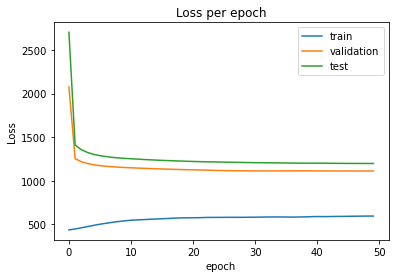

In [140]:
show_diagrams(training_losses,valid_losses,test_losses)

### Experiment 2 : batch_size = 8


In [142]:
model = Model(in_features, out_features, hidden_layers, p=0.5, activation_function = nn.ReLU(inplace = True))
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
batch_size = 8
epochs = 50
training_losses,valid_losses,test_losses = mini_batch_train(epochs, batch_size,model,criterion,optimizer)

Epoch:   1  Training Loss: 372.92962646 Validation Loss: 2083.39453125 Test Loss: 2714.92822265625
Epoch:   6  Training Loss: 394.96588135 Validation Loss: 1190.5777587890625 Test Loss: 1325.141845703125
Epoch:  11  Training Loss: 427.66928101 Validation Loss: 1158.982666015625 Test Loss: 1275.1922607421875
Epoch:  16  Training Loss: 451.09417725 Validation Loss: 1143.9720458984375 Test Loss: 1252.5242919921875
Epoch:  21  Training Loss: 464.68304443 Validation Loss: 1134.73779296875 Test Loss: 1239.4515380859375
Epoch:  26  Training Loss: 472.27993774 Validation Loss: 1126.9888916015625 Test Loss: 1229.7587890625
Epoch:  31  Training Loss: 477.84628296 Validation Loss: 1120.70751953125 Test Loss: 1221.22509765625
Epoch:  36  Training Loss: 483.86517334 Validation Loss: 1115.75390625 Test Loss: 1213.975341796875
Epoch:  41  Training Loss: 488.56750488 Validation Loss: 1112.1705322265625 Test Loss: 1208.0264892578125
Epoch:  46  Training Loss: 490.40365601 Validation Loss: 1108.03125 Te

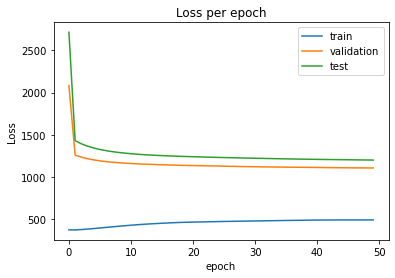

In [143]:
show_diagrams(training_losses,valid_losses,test_losses)

### Experiment 3 : batch_size = 16


In [155]:
model = Model(in_features, out_features, hidden_layers, p=0.5, activation_function = nn.ReLU(inplace = True))
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
batch_size = 16
epochs = 50

In [156]:
training_losses,valid_losses,test_losses = mini_batch_train(epochs, batch_size,model,criterion,optimizer)

Epoch:   1  Training Loss: 1137.62475586 Validation Loss: 2087.594482421875 Test Loss: 2716.100830078125
Epoch:   6  Training Loss: 1027.18579102 Validation Loss: 1185.0115966796875 Test Loss: 1378.986572265625
Epoch:  11  Training Loss: 939.36700439 Validation Loss: 1153.867431640625 Test Loss: 1328.41845703125
Epoch:  16  Training Loss: 884.70690918 Validation Loss: 1136.6549072265625 Test Loss: 1299.613525390625
Epoch:  21  Training Loss: 846.92059326 Validation Loss: 1125.843017578125 Test Loss: 1281.531494140625
Epoch:  26  Training Loss: 818.51379395 Validation Loss: 1118.2628173828125 Test Loss: 1269.41455078125
Epoch:  31  Training Loss: 794.95281982 Validation Loss: 1112.9783935546875 Test Loss: 1260.6048583984375
Epoch:  36  Training Loss: 774.90289307 Validation Loss: 1108.6722412109375 Test Loss: 1253.927978515625
Epoch:  41  Training Loss: 755.68096924 Validation Loss: 1105.123046875 Test Loss: 1248.3525390625
Epoch:  46  Training Loss: 739.53369141 Validation Loss: 1103.0

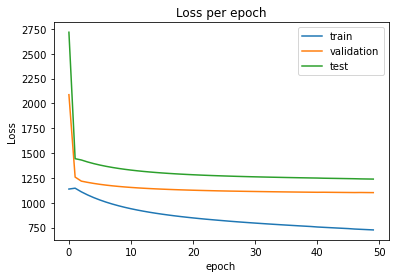

In [157]:
show_diagrams(training_losses,valid_losses,test_losses)

# Part 5 : Neural Network with 1 or 2 hidden layers

### One hidden layer

In [263]:
hidden_layers = [128]
model = Model(in_features, out_features, hidden_layers, p=0.4, activation_function = nn.ReLU(inplace=True))
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
batch_size = 4
epochs = 50

In [264]:
training_losses,valid_losses,test_losses = mini_batch_train(epochs, batch_size,model,criterion,optimizer)

Epoch:   1  Training Loss: 30.14392090 Validation Loss: 36.52543258666992 Test Loss: 41.9664421081543
Epoch:   6  Training Loss: 16.83256531 Validation Loss: 24.884592056274414 Test Loss: 26.46668243408203
Epoch:  11  Training Loss: 15.08112907 Validation Loss: 24.34933853149414 Test Loss: 26.275875091552734
Epoch:  16  Training Loss: 15.37900925 Validation Loss: 23.90640640258789 Test Loss: 26.44235610961914
Epoch:  21  Training Loss: 17.24248505 Validation Loss: 23.663835525512695 Test Loss: 26.598873138427734
Epoch:  26  Training Loss: 18.94375420 Validation Loss: 23.677976608276367 Test Loss: 26.268030166625977
Epoch:  31  Training Loss: 21.06715775 Validation Loss: 24.10591697692871 Test Loss: 25.723140716552734
Epoch:  36  Training Loss: 22.73626328 Validation Loss: 24.559385299682617 Test Loss: 25.42424964904785
Epoch:  41  Training Loss: 22.54436302 Validation Loss: 24.864803314208984 Test Loss: 24.944486618041992
Epoch:  46  Training Loss: 23.61811447 Validation Loss: 24.21803

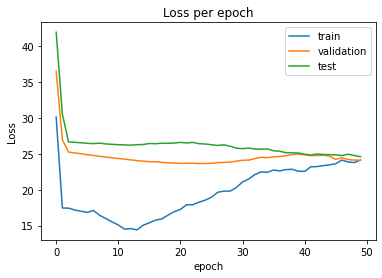

In [265]:
show_diagrams(training_losses,valid_losses,test_losses)

### Two hidden layers

In [240]:
hidden_layers = [128,64]
model = Model(in_features, out_features, hidden_layers, p=0.4, activation_function = nn.ReLU(inplace=True))
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
batch_size = 4
epochs = 50

Epoch:   1  Training Loss: 44.93004608 Validation Loss: 36.51309585571289 Test Loss: 41.948997497558594
Epoch:   6  Training Loss: 14.92746639 Validation Loss: 24.345020294189453 Test Loss: 26.23956871032715
Epoch:  11  Training Loss: 18.25562668 Validation Loss: 23.905046463012695 Test Loss: 26.474849700927734
Epoch:  16  Training Loss: 20.36013603 Validation Loss: 23.824430465698242 Test Loss: 26.506689071655273
Epoch:  21  Training Loss: 29.05882263 Validation Loss: 24.586156845092773 Test Loss: 25.635631561279297
Epoch:  26  Training Loss: 26.85707474 Validation Loss: 26.22180938720703 Test Loss: 25.470003128051758
Epoch:  31  Training Loss: 26.61475754 Validation Loss: 25.614816665649414 Test Loss: 24.72467613220215
Epoch:  36  Training Loss: 26.44740677 Validation Loss: 24.970491409301758 Test Loss: 24.565185546875
Epoch:  41  Training Loss: 26.09021187 Validation Loss: 25.226253509521484 Test Loss: 24.300188064575195
Epoch:  46  Training Loss: 22.06313324 Validation Loss: 24.140

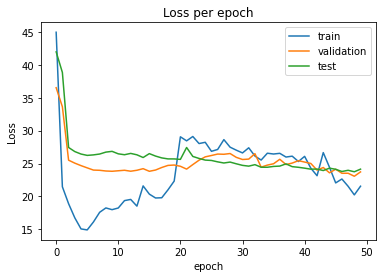

In [241]:
training_losses,valid_losses,test_losses = mini_batch_train(epochs, batch_size,model,criterion,optimizer)
show_diagrams(training_losses,valid_losses,test_losses)

### The winner model
As you can see, this model with 128 and 64 neurons in hidden layers works better because the MAE and MSE is better. And also the MAE of this part is better than previous parts.

This Model :

    Epoch: 50  Training Loss: 19.60209656 Validation Loss: 24.79427146911621 Test Loss: 24.296598434448242
Previous Models : 

    Epoch:  50  Training Loss: 39.25865555 Validation Loss: 36.00834274291992 Test Loss: 41.45527648925781

The winner model parameters :
<ul>
    <li>2 hidden layers with 128 and 64 neurons respectively.</li>
    <li>Activation Function : ReLU</li>
    <li>Optimizer : SGD</li>
    <li>Batch Size : 4</li>
    <li>Learning Rate : 0.001</li>
</ul>

### How to choose hidden layer neurons

Deciding the number of neurons in the hidden layers is a very important part of deciding your overall neural network architecture.

<ul>
    <li>The number of hidden neurons should be between the size of the input layer and the size of the output layer.</li>
    <li>The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.</li>
    <li>The number of hidden neurons should be less than twice the size of the input layer.</li>
</ul>

# Part 6 : Add Dropout Layer

### Adding dropout layer to the model without any hidden layer

The training/validation/test loss got better with Dropout layer.

<b>Neural Network without hidden layer (With Dropout) : </b>

    Epoch:  50  Training Loss: 24.85396385 Validation Loss: 24.988988876342773 Test Loss: 27.90833282470703

<b>Neural Network without hidden layer (Without Dropout) : </b>

    Epoch:  50  Training Loss: 39.25865555 Validation Loss: 36.00834274291992 Test Loss: 41.45527648925781

In [280]:
hidden_layers = []
model = Model(in_features, out_features, hidden_layers, p=0.1, activation_function = nn.ReLU(inplace=True), enable_dropout = True)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [281]:
batch_size = 4
epochs = 200
training_losses,valid_losses,test_losses = mini_batch_train(epochs, batch_size,model,criterion,optimizer)

Epoch:   1  Training Loss: 48.91851044 Validation Loss: 36.55374526977539 Test Loss: 41.99649429321289
Epoch:   6  Training Loss: 29.00000954 Validation Loss: 27.95040512084961 Test Loss: 32.39714431762695
Epoch:  11  Training Loss: 20.17964172 Validation Loss: 26.535470962524414 Test Loss: 28.122438430786133
Epoch:  16  Training Loss: 17.78153610 Validation Loss: 25.981098175048828 Test Loss: 28.77781105041504
Epoch:  21  Training Loss: 33.17590332 Validation Loss: 26.1761531829834 Test Loss: 27.93320083618164
Epoch:  26  Training Loss: 16.58538437 Validation Loss: 25.626785278320312 Test Loss: 27.61595344543457
Epoch:  31  Training Loss: 16.50260735 Validation Loss: 27.602161407470703 Test Loss: 27.487037658691406
Epoch:  36  Training Loss: 16.08199692 Validation Loss: 26.613645553588867 Test Loss: 28.00016212463379
Epoch:  41  Training Loss: 16.03327942 Validation Loss: 25.81369972229004 Test Loss: 28.015548706054688
Epoch:  46  Training Loss: 15.94164371 Validation Loss: 26.4295845

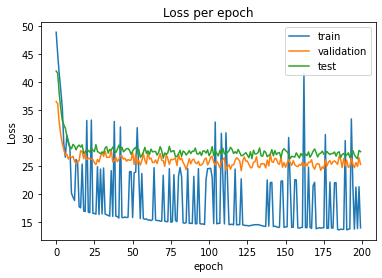

In [282]:
show_diagrams(training_losses,valid_losses,test_losses)

### Adding dropout layer to the model with one hidden layer

The training/validation/test loss got better with Dropout layer.

<b>Neural Network with one hidden layer (With Dropout) : </b>

    Epoch: 200  Training Loss: 20.76536369 Validation Loss: 23.608842849731445 Test Loss: 23.40304946899414

<b>Neural Network with one hidden layer (Without Dropout) : </b>

    Epoch: 50  Training Loss: 24.12952042 Validation Loss: 24.108455657958984 Test Loss: 24.60411834716797

In [277]:
hidden_layers = [128]
model = Model(in_features, out_features, hidden_layers, p=0.4,
            activation_function = nn.ReLU(inplace=True),enable_dropout= True)


In [278]:
%%time
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
batch_size = 4
epochs = 200
training_losses,valid_losses,test_losses = mini_batch_train(epochs, batch_size,model,criterion,optimizer)

Epoch:   1  Training Loss: 35.93862915 Validation Loss: 36.58230209350586 Test Loss: 42.014163970947266
Epoch:   6  Training Loss: 19.84797096 Validation Loss: 25.3197078704834 Test Loss: 26.75871467590332
Epoch:  11  Training Loss: 15.65837860 Validation Loss: 24.922916412353516 Test Loss: 26.353174209594727
Epoch:  16  Training Loss: 20.23684311 Validation Loss: 24.187549591064453 Test Loss: 26.995010375976562
Epoch:  21  Training Loss: 20.63908768 Validation Loss: 24.271818161010742 Test Loss: 26.56427574157715
Epoch:  26  Training Loss: 21.65841293 Validation Loss: 24.238801956176758 Test Loss: 26.508209228515625
Epoch:  31  Training Loss: 23.44415092 Validation Loss: 24.38168716430664 Test Loss: 26.60601234436035
Epoch:  36  Training Loss: 24.78095818 Validation Loss: 25.14406394958496 Test Loss: 26.06496238708496
Epoch:  41  Training Loss: 25.27487564 Validation Loss: 25.044992446899414 Test Loss: 25.64516258239746
Epoch:  46  Training Loss: 25.14847946 Validation Loss: 24.915300

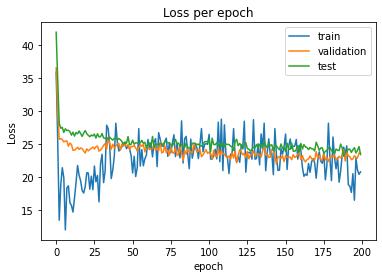

In [279]:
show_diagrams(training_losses,valid_losses,test_losses)

### Adding dropout layer to the model with two hidden layer

The training/validation/test loss didn't change much with Dropout layer.

<b>Neural Network with two hidden layer (With Dropout) : </b>

    Epoch: 200  Training Loss: 8.80532551 Validation Loss: 21.46870994567871 Test Loss: 24.55977439880371

<b>Neural Network with two hidden layer (Without Dropout) : </b>

    Epoch: 50  Training Loss: 21.56114197 Validation Loss: 23.735363006591797 Test Loss: 24.15113067626953

In [289]:
hidden_layers = [128,64]
model = Model(in_features, out_features, hidden_layers, p=0.1,
            activation_function = nn.ReLU(inplace=True),enable_dropout= True)

In [290]:
%%time
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
batch_size = 4
epochs = 200
training_losses,valid_losses,test_losses = mini_batch_train(epochs, batch_size,model,criterion,optimizer)

Epoch:   1  Training Loss: 36.05513763 Validation Loss: 36.544559478759766 Test Loss: 41.977840423583984
Epoch:   6  Training Loss: 16.13249588 Validation Loss: 24.628419876098633 Test Loss: 26.716459274291992
Epoch:  11  Training Loss: 19.86447334 Validation Loss: 24.418012619018555 Test Loss: 27.00939178466797
Epoch:  16  Training Loss: 23.51426697 Validation Loss: 24.027175903320312 Test Loss: 26.552614212036133
Epoch:  21  Training Loss: 25.33156776 Validation Loss: 24.0824031829834 Test Loss: 26.102645874023438
Epoch:  26  Training Loss: 24.60921097 Validation Loss: 25.469295501708984 Test Loss: 25.13011932373047
Epoch:  31  Training Loss: 24.69830513 Validation Loss: 23.946611404418945 Test Loss: 25.06675910949707
Epoch:  36  Training Loss: 32.42048264 Validation Loss: 25.299732208251953 Test Loss: 24.9273681640625
Epoch:  41  Training Loss: 24.16457176 Validation Loss: 24.6064510345459 Test Loss: 24.201364517211914
Epoch:  46  Training Loss: 22.35148621 Validation Loss: 24.77851

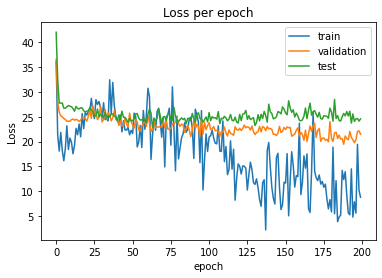

In [291]:
show_diagrams(training_losses,valid_losses,test_losses)

# Part 7 : Batch Normalization
The performance of the model with batch normalization is slightly better. And I also tried different batch sizes for each model. The results with batch_size = 8 was better. <b>So batch size does make a difference.</b>

For example, in the model without any hidden layer the results with different batch sizes were different.

Batch Size = 4 :

    Epoch: 100  Training Loss: 16.72462845 Validation Loss: 24.996891021728516 Test Loss: 26.932558059692383
Batch Size = 8 :

    Epoch: 100  Training Loss: 14.30019569 Validation Loss: 24.45240592956543 Test Loss: 25.208208084106445


### 1) Zero hidden layer

In [303]:
hidden_layers = []
model = Model(in_features, out_features, hidden_layers, p=0.1, activation_function = nn.ReLU(inplace=True),
            enable_dropout = True, enable_batch_normalization = True)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#### Batch Size = 4

In [304]:
%%time
batch_size = 4
epochs = 100
training_losses,valid_losses,test_losses = mini_batch_train(epochs, batch_size,model,criterion,optimizer)

Epoch:   1  Training Loss: 47.89925385 Validation Loss: 36.41914367675781 Test Loss: 41.84770965576172
Epoch:   6  Training Loss: 35.99623871 Validation Loss: 25.330913543701172 Test Loss: 28.9970703125
Epoch:  11  Training Loss: 19.09636879 Validation Loss: 23.897125244140625 Test Loss: 27.95857810974121
Epoch:  16  Training Loss: 19.83423996 Validation Loss: 24.370895385742188 Test Loss: 26.506258010864258
Epoch:  21  Training Loss: 19.12012100 Validation Loss: 24.071006774902344 Test Loss: 27.53255844116211
Epoch:  26  Training Loss: 23.70106888 Validation Loss: 23.84262466430664 Test Loss: 26.473669052124023
Epoch:  31  Training Loss: 23.03184128 Validation Loss: 23.698627471923828 Test Loss: 27.24036979675293
Epoch:  36  Training Loss: 15.59183121 Validation Loss: 24.758501052856445 Test Loss: 26.712799072265625
Epoch:  41  Training Loss: 16.38268280 Validation Loss: 24.520681381225586 Test Loss: 26.229124069213867
Epoch:  46  Training Loss: 23.09301376 Validation Loss: 24.7763938

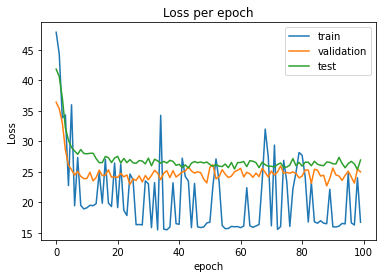

In [305]:
show_diagrams(training_losses,valid_losses,test_losses)

#### Batch Size = 8


Epoch:   1  Training Loss: 48.63601685 Validation Loss: 36.36231994628906 Test Loss: 41.83192825317383
Epoch:   6  Training Loss: 37.35523224 Validation Loss: 32.26008605957031 Test Loss: 37.29832458496094
Epoch:  11  Training Loss: 36.02733994 Validation Loss: 23.488845825195312 Test Loss: 28.839853286743164
Epoch:  16  Training Loss: 19.76366425 Validation Loss: 26.195140838623047 Test Loss: 28.139598846435547
Epoch:  21  Training Loss: 23.87018013 Validation Loss: 24.1007137298584 Test Loss: 26.526342391967773
Epoch:  26  Training Loss: 19.08089066 Validation Loss: 25.232446670532227 Test Loss: 27.193174362182617
Epoch:  31  Training Loss: 24.64947510 Validation Loss: 23.769466400146484 Test Loss: 26.69806671142578
Epoch:  36  Training Loss: 26.95101547 Validation Loss: 24.962451934814453 Test Loss: 26.008960723876953
Epoch:  41  Training Loss: 16.56210709 Validation Loss: 24.823184967041016 Test Loss: 26.02180290222168
Epoch:  46  Training Loss: 15.37811852 Validation Loss: 24.1214

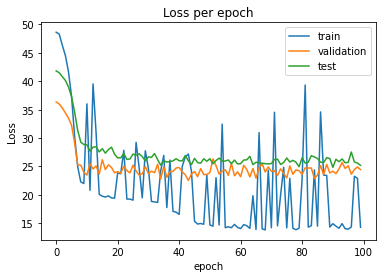

In [307]:
%%time
batch_size = 8
epochs = 100
model = Model(in_features, out_features, hidden_layers, p=0.1, activation_function = nn.ReLU(inplace=True),
            enable_dropout = True, enable_batch_normalization = True)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
training_losses,valid_losses,test_losses = mini_batch_train(epochs, batch_size,model,criterion,optimizer)
show_diagrams(training_losses,valid_losses,test_losses)


### 2) One hidden layer


In [313]:
hidden_layers = [128]
model = Model(in_features, out_features, hidden_layers, p=0.1, activation_function = nn.ReLU(inplace=True),
            enable_dropout = True, enable_batch_normalization = True)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#### Batch Size = 4

Epoch:   1  Training Loss: 48.06127167 Validation Loss: 36.54461669921875 Test Loss: 42.019866943359375
Epoch:   6  Training Loss: 20.00753403 Validation Loss: 22.651248931884766 Test Loss: 25.71036148071289
Epoch:  11  Training Loss: 23.27529526 Validation Loss: 23.633024215698242 Test Loss: 23.758832931518555
Epoch:  16  Training Loss: 29.30154419 Validation Loss: 24.899208068847656 Test Loss: 23.916160583496094
Epoch:  21  Training Loss: 23.55874825 Validation Loss: 25.87247085571289 Test Loss: 24.181652069091797
Epoch:  26  Training Loss: 33.77556992 Validation Loss: 24.133867263793945 Test Loss: 24.89191436767578
Epoch:  31  Training Loss: 22.93031883 Validation Loss: 24.85866355895996 Test Loss: 25.745868682861328
Epoch:  36  Training Loss: 25.61676025 Validation Loss: 25.30338478088379 Test Loss: 25.51007652282715
Epoch:  41  Training Loss: 31.80470467 Validation Loss: 24.620912551879883 Test Loss: 25.36992645263672
Epoch:  46  Training Loss: 30.15955925 Validation Loss: 23.9802

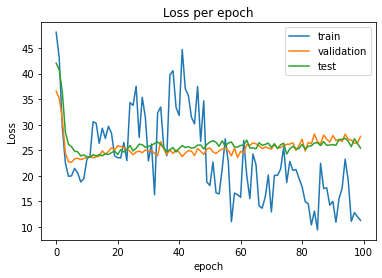

CPU times: user 28.2 s, sys: 16.2 s, total: 44.4 s
Wall time: 31.4 s


In [314]:
%%time
batch_size = 4
epochs = 100
training_losses,valid_losses,test_losses = mini_batch_train(epochs, batch_size,model,criterion,optimizer)
show_diagrams(training_losses,valid_losses,test_losses)

#### Batch Size = 8

Epoch:   1  Training Loss: 48.82366562 Validation Loss: 36.51918029785156 Test Loss: 41.9394645690918
Epoch:   6  Training Loss: 29.73490524 Validation Loss: 26.638010025024414 Test Loss: 31.59139060974121
Epoch:  11  Training Loss: 19.11078644 Validation Loss: 22.40689468383789 Test Loss: 23.510875701904297
Epoch: 15  Training Loss: 24.62631226 Validation Loss: 22.167144775390625 Test Loss: 22.75712013244629


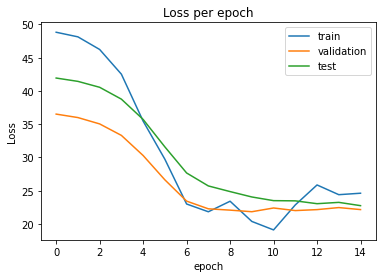

CPU times: user 2.17 s, sys: 1.17 s, total: 3.34 s
Wall time: 2.35 s


In [315]:
%%time
batch_size = 8
epochs = 15
model = Model(in_features, out_features, hidden_layers, p=0.1, activation_function = nn.ReLU(inplace=True),
            enable_dropout = True, enable_batch_normalization = True)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
training_losses,valid_losses,test_losses = mini_batch_train(epochs, batch_size,model,criterion,optimizer)
show_diagrams(training_losses,valid_losses,test_losses)

### 3) Two hidden layers

In [316]:
hidden_layers = [128,64]
model = Model(in_features, out_features, hidden_layers, p=0.1, activation_function = nn.ReLU(inplace=True),
            enable_dropout = True, enable_batch_normalization = True)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


#### Batch Size = 4

Epoch:   1  Training Loss: 48.14212418 Validation Loss: 36.50466537475586 Test Loss: 41.930198669433594
Epoch:   6  Training Loss: 26.26562500 Validation Loss: 23.91388702392578 Test Loss: 25.908340454101562
Epoch:  11  Training Loss: 16.04480362 Validation Loss: 24.997468948364258 Test Loss: 25.63582420349121
Epoch:  16  Training Loss: 19.93900681 Validation Loss: 25.746519088745117 Test Loss: 25.635622024536133
Epoch:  21  Training Loss: 12.85325432 Validation Loss: 27.74827003479004 Test Loss: 25.672225952148438
Epoch:  26  Training Loss: 16.12883759 Validation Loss: 27.333850860595703 Test Loss: 26.40426254272461
Epoch:  31  Training Loss: 28.56284332 Validation Loss: 27.293407440185547 Test Loss: 26.3643798828125
Epoch:  36  Training Loss: 13.88274956 Validation Loss: 27.461122512817383 Test Loss: 26.006126403808594
Epoch:  41  Training Loss: 16.32897758 Validation Loss: 27.43752098083496 Test Loss: 26.84707260131836
Epoch:  46  Training Loss: 16.89708519 Validation Loss: 26.75055

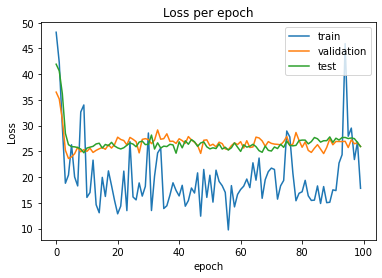

CPU times: user 34.6 s, sys: 21.3 s, total: 55.9 s
Wall time: 38 s


In [317]:
%%time
batch_size = 4
epochs = 100
training_losses,valid_losses,test_losses = mini_batch_train(epochs, batch_size,model,criterion,optimizer)
show_diagrams(training_losses,valid_losses,test_losses)


#### Batch Size = 8

Epoch:   1  Training Loss: 48.86345673 Validation Loss: 36.5994873046875 Test Loss: 41.991634368896484
Epoch:   6  Training Loss: 30.25541306 Validation Loss: 27.01405143737793 Test Loss: 31.67629051208496
Epoch:  11  Training Loss: 34.89363480 Validation Loss: 24.5869140625 Test Loss: 24.848676681518555
Epoch: 15  Training Loss: 31.21176147 Validation Loss: 23.08993911743164 Test Loss: 24.759292602539062


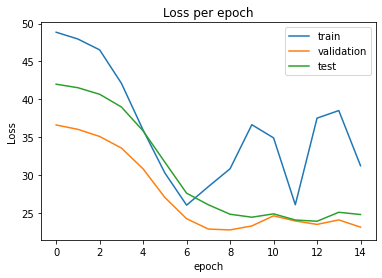

CPU times: user 2.93 s, sys: 1.7 s, total: 4.63 s
Wall time: 3.19 s


In [318]:
%%time
batch_size = 8
epochs = 15
model = Model(in_features, out_features, hidden_layers, p=0.1, activation_function = nn.ReLU(inplace=True),
            enable_dropout = True, enable_batch_normalization = True)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
training_losses,valid_losses,test_losses = mini_batch_train(epochs, batch_size,model,criterion,optimizer)
show_diagrams(training_losses,valid_losses,test_losses)


# Part 8 : More hidden layers

In [345]:
hidden_layers = [128,90,70]
model = Model(in_features, out_features, hidden_layers, p=0.1, activation_function = nn.ReLU(inplace= True),
            enable_dropout = True)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Epoch:   1  Training Loss: 46.06908417 Validation Loss: 36.54243469238281 Test Loss: 41.98584747314453
Epoch:   6  Training Loss: 17.31212234 Validation Loss: 24.53360939025879 Test Loss: 26.974668502807617
Epoch:  11  Training Loss: 21.39644623 Validation Loss: 24.79041290283203 Test Loss: 26.36368751525879
Epoch:  16  Training Loss: 26.22759819 Validation Loss: 24.42110252380371 Test Loss: 26.93545150756836
Epoch:  21  Training Loss: 31.13757896 Validation Loss: 28.21663475036621 Test Loss: 26.022268295288086
Epoch:  26  Training Loss: 18.93076324 Validation Loss: 23.324853897094727 Test Loss: 24.75325584411621
Epoch:  31  Training Loss: 29.64721680 Validation Loss: 23.094045639038086 Test Loss: 24.759601593017578
Epoch:  36  Training Loss: 24.01453400 Validation Loss: 24.86227798461914 Test Loss: 25.942150115966797
Epoch:  41  Training Loss: 26.77181244 Validation Loss: 25.231740951538086 Test Loss: 24.518226623535156
Epoch:  46  Training Loss: 24.27566719 Validation Loss: 24.550844

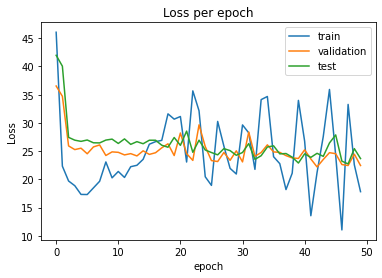

CPU times: user 8.49 s, sys: 89.8 ms, total: 8.58 s
Wall time: 8.6 s


In [346]:
%%time
epochs = 50
batch_size = 4
training_losses,valid_losses,test_losses = mini_batch_train(epochs, batch_size,model,criterion,optimizer)
show_diagrams(training_losses,valid_losses,test_losses)